<a href="https://colab.research.google.com/github/mndasght86/DataMining/blob/main/PreprocessingData_tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from google.colab import files

In [4]:
uploaded = files.upload()
file_path = "data.csv"
df = pd.read_csv(file_path, delimiter=';')
df.head()

Saving data.csv to data.csv


,Nama Produk,Kategori,Harga (Rp),Stok,Rating,Status Promo
0,Smartphone,Elektronik,1139396.0,70.0,3.05,Normal
1,Laptop,Elektronik,1091264.0,89.0,3.05,Normal
2,Kaos,Pakaian,761864.0,24.0,2.03,Normal
3,Sepatu,Pakaian,673175.0,8.0,1.09,NaN
4,Kopi,Makanan,279078.0,NaN,3.08,Normal


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nama Produk   10 non-null     object 
 1   Kategori      10 non-null     object 
 2   Harga (Rp)    9 non-null      float64
 3   Stok          9 non-null      float64
 4   Rating        10 non-null     float64
 5   Status Promo  9 non-null      object 
dtypes: float64(3), object(3)
memory usage: 612.0+ bytes


,Harga (Rp),Stok,Rating
count,9.000000e+00,9.000000,10.000000
mean,9.031806e+05,38.555556,3.155000
std,4.874434e+05,30.911612,0.988571
min,2.790780e+05,8.000000,1.090000
25%,6.228600e+05,13.000000,3.042500
50%,7.618640e+05,24.000000,3.065000
75%,1.139396e+06,70.000000,4.035000
max,1.712152e+06,89.000000,4.090000


In [13]:
for column in df.columns:
    df.loc[:, column] = df[column].fillna(df[column].mode()[0])
print(df.isnull().sum())


Nama Produk     0
Kategori        0
Harga (Rp)      0
Stok            0
Rating          0
Status Promo    0
dtype: int64


In [14]:
df['Harga (Rp)'] = df['Harga (Rp)'].fillna(0).astype(int)
df['Stok'] = df['Stok'].astype(int)
df['Rating'] = df['Rating'].astype(float)
df.dtypes

,0
Nama Produk,object
Kategori,int64
Harga (Rp),int64
Stok,int64
Rating,float64
Status Promo,int64


In [18]:
encoder = LabelEncoder()
df['Kategori'] = encoder.fit_transform(df['Kategori'])
df['Status Promo'] = encoder.fit_transform(df['Status Promo'])
df.head()

,Nama Produk,Kategori,Harga (Rp),Stok,Rating,Status Promo
0,Smartphone,1,0.0,0.0,0.653333,0
1,Laptop,1,0.0,1.0,0.653333,0
2,Kaos,3,0.0,0.0,0.313333,0
3,Sepatu,3,0.0,0.0,0.000000,2
4,Kopi,2,0.0,0.0,0.663333,0


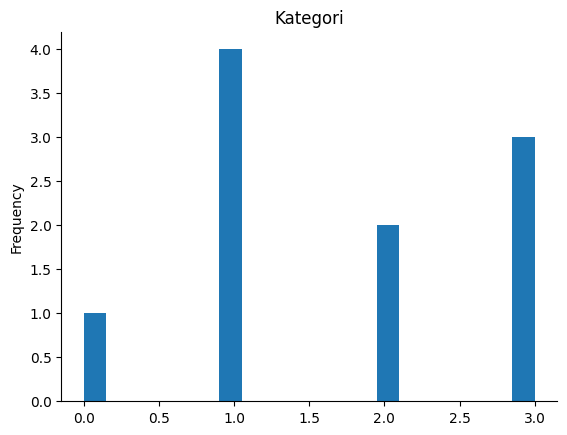

In [19]:
# @title Kategori

from matplotlib import pyplot as plt
df['Kategori'].plot(kind='hist', bins=20, title='Kategori')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:

scaler = MinMaxScaler()
df[['Harga (Rp)', 'Stok', 'Rating']] = scaler.fit_transform(df[['Harga (Rp)', 'Stok', 'Rating']])
df.head()


,Nama Produk,Kategori,Harga (Rp),Stok,Rating,Status Promo
0,Smartphone,1,0.0,0.0,0.653333,0
1,Laptop,1,0.0,1.0,0.653333,0
2,Kaos,3,0.0,0.0,0.313333,0
3,Sepatu,3,0.0,0.0,0.000000,2
4,Kopi,2,0.0,0.0,0.663333,0


In [11]:
df.to_csv("data_cleaned.csv", index=False)
files.download("data_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>